In [108]:
from glob import glob
import os
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [109]:
def get_slice_id(filename):
    """Read slice id from filename."""
    try:
        slice_id = int(os.path.basename(filename).split('.')[0])
    except ValueError:
        slice_id = None

    return slice_id

In [110]:
df = {}
for analysis_fn in glob("../data/z-stacks/**/**/*PyIQ_analyze_out.csv"):
    stack_id = analysis_fn.split('/')[3]

    analysis = pd.read_csv(analysis_fn)

    # It is important that all slices are sorted to see if a statistic goes with slice depth.
    analysis["slice_id"] = analysis.apply(lambda x: get_slice_id(x['Filename']), axis=1)
    analysis = analysis.sort_values(by="slice_id")
    analysis.set_index("slice_id")

    df[stack_id] = analysis["Kurtosis"].to_numpy()

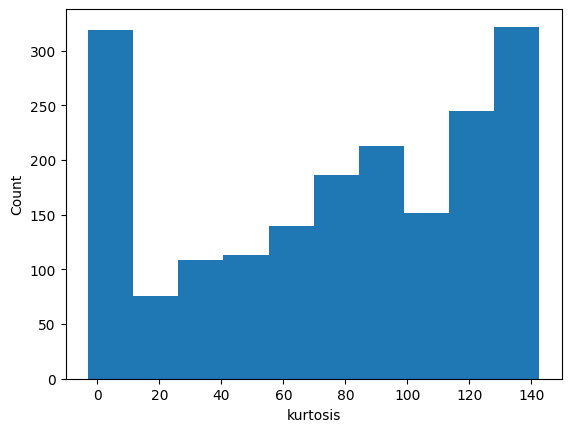

In [111]:
h = np.concatenate([v for v in df.values()])
plt.hist(h)
plt.ylabel("Count")
plt.xlabel("kurtosis")
plt.show()

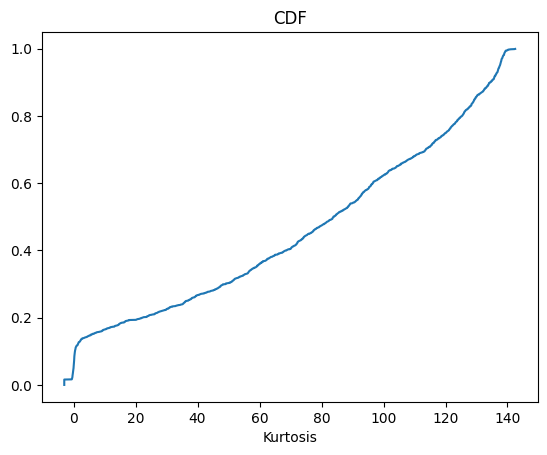

In [117]:
# CDF is the probability that Kurtosis will take a value <= Kurtosis.
# Handy to see how many slices have a specific kurtosis or lower.
plt.plot(np.sort(h), np.array(range(len(h))) / len(h))
plt.title("CDF")
plt.xlabel("Kurtosis")
plt.show()

In [112]:
for i in range(62):
    try:
        fig = px.line(df[str(i)])
        fig.show()
    except KeyError:
        continue
